## **Implemention of The Perceptron Algorithm**

---

### **Part 1. Iris Dataset (non-linearly seperable example)**
Using "versicolor" and "virginica" flowers in iris data set to rerun the perceptron model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions # pip install mlxtend

sns.set_theme()

df = pd.read_csv("Datasets/iris_dataset.csv")

In [2]:
df[(df.species == "versicolor") | (df.species == "virginica")] 
# select the species of "versicolor" and "virginica"
# seems like their location are rows between 50 and 149(inclusive)
# replaced with df.iloc[50:150] in the following code

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Figure size 600x300 with 0 Axes>

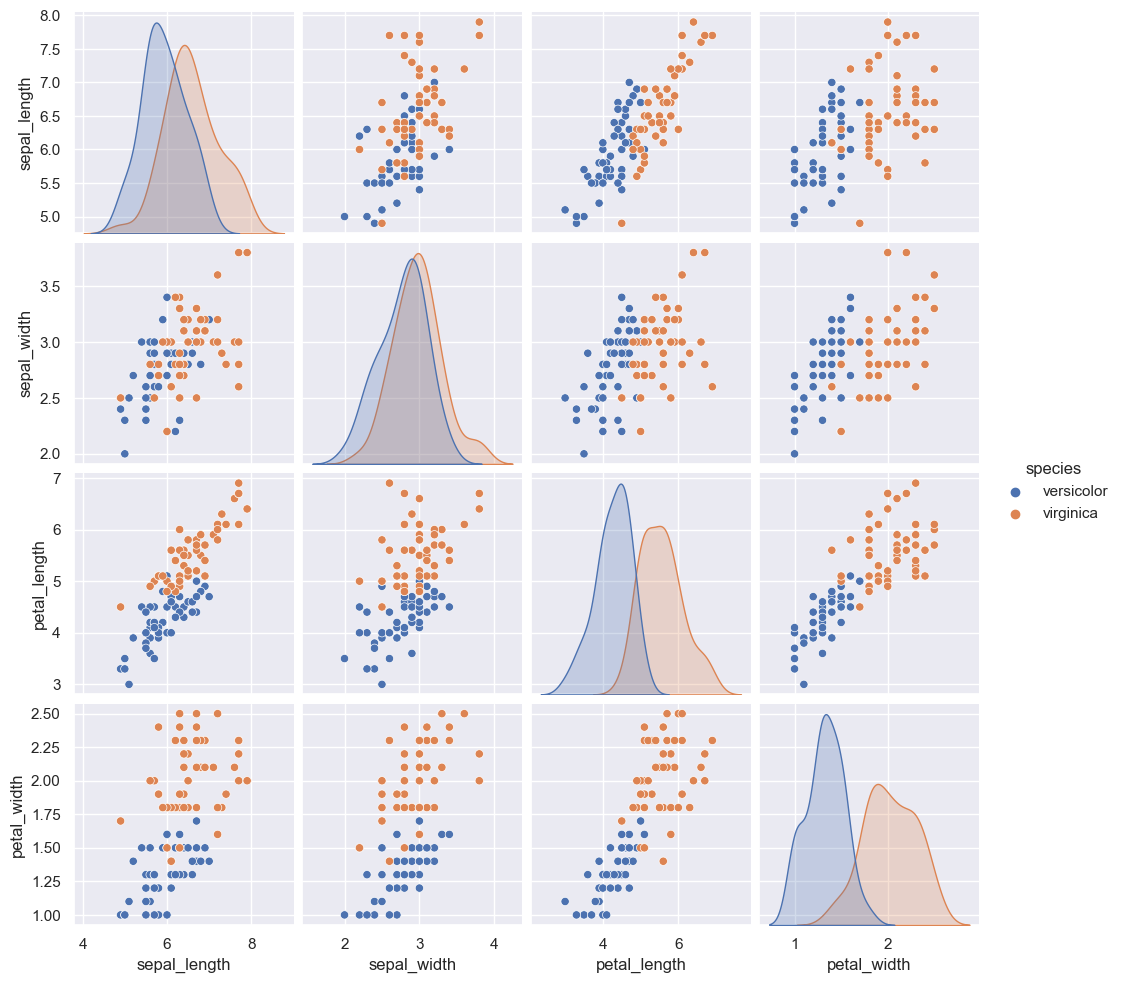

In [3]:
plt.figure(figsize=(6, 3))
img = sns.pairplot(df.iloc[50:150], hue  = "species")
plt.show(img)

# According to the plot, possible choice of measurements may not be ("sepal_length","sepal_width")
# Therefore we'll try some other measurements

In [4]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

---

#### Measurements Choices
* "sepal_length" and "petal_length"

[ True  True  True  True  True False False  True  True  True  True  True
  True False  True  True False  True  True  True False  True False False
  True  True  True False  True  True  True  True  True False False  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


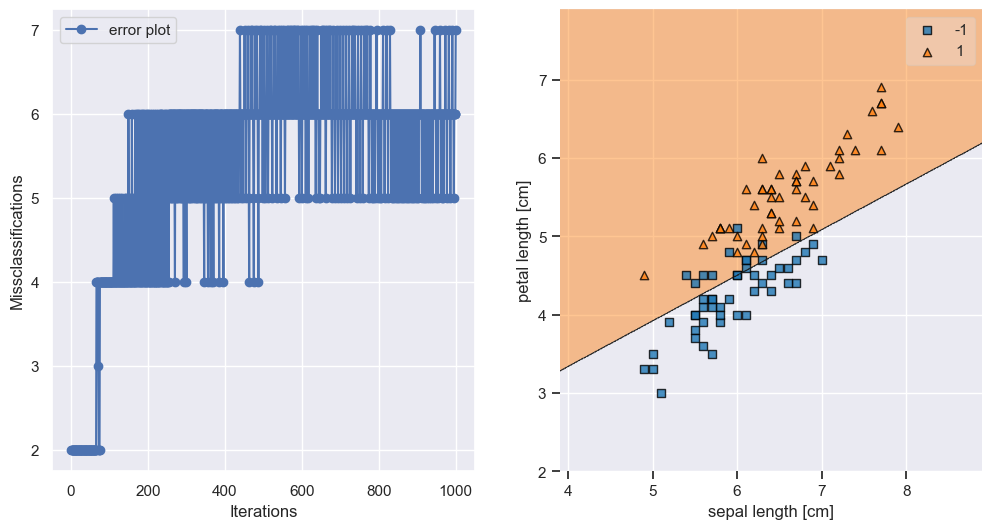

In [5]:
y = df.iloc[50:150].species.values
y = np.where(y =="versicolor", -1, 1) # value "versicolor" == -1; "virginica" == 1
X = df[["sepal_length", "petal_length"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="sepal length [cm]", ylabel="petal length [cm]")
axes[0].legend()
plt.show()


* "sepal_length" and "petal_width"

[ True False  True False False  True False  True  True False  True False
  True False  True  True False  True False  True False  True False  True
  True  True  True False False  True  True  True  True False False False
 False  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


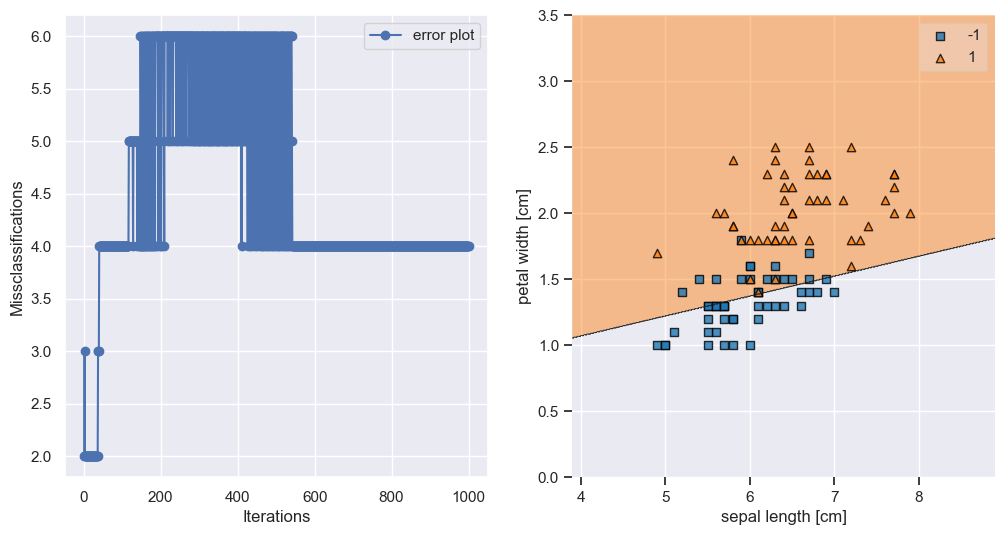

In [6]:
X = df[["sepal_length", "petal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="sepal length [cm]", ylabel="petal width [cm]")
axes[0].legend()
plt.show()

* "sepal_width" and "petal_length"

[ True  True False  True False  True  True  True  True  True  True  True
 False False  True  True  True  True False  True  True  True False False
  True  True False False  True  True  True  True  True False  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


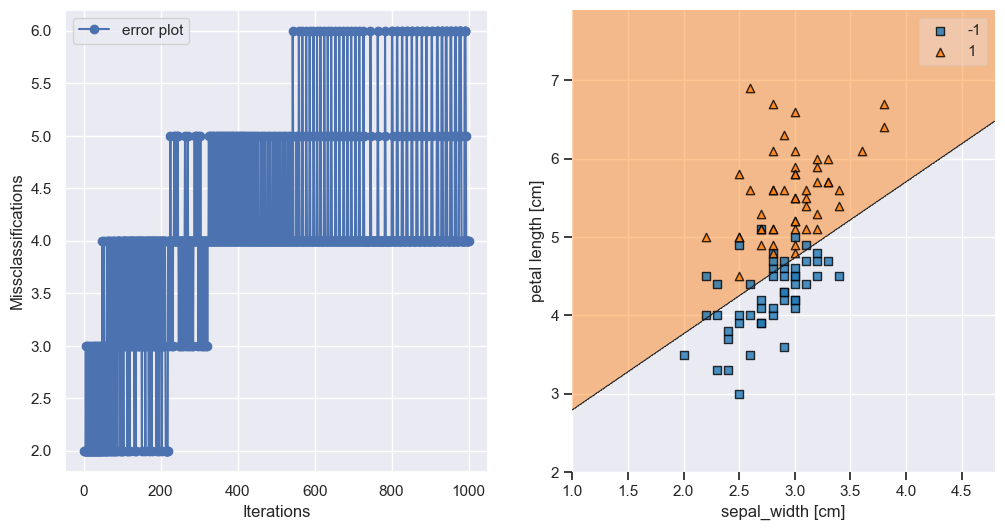

In [7]:
X = df[["sepal_width", "petal_length"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="sepal_width [cm]", ylabel="petal length [cm]")
axes[0].legend()
plt.show()

* "sepal_width" and "petal_width"

[ True  True False False False  True False  True  True False  True False
  True  True  True  True False  True False  True False  True False  True
  True  True False False False  True  True  True  True False False False
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


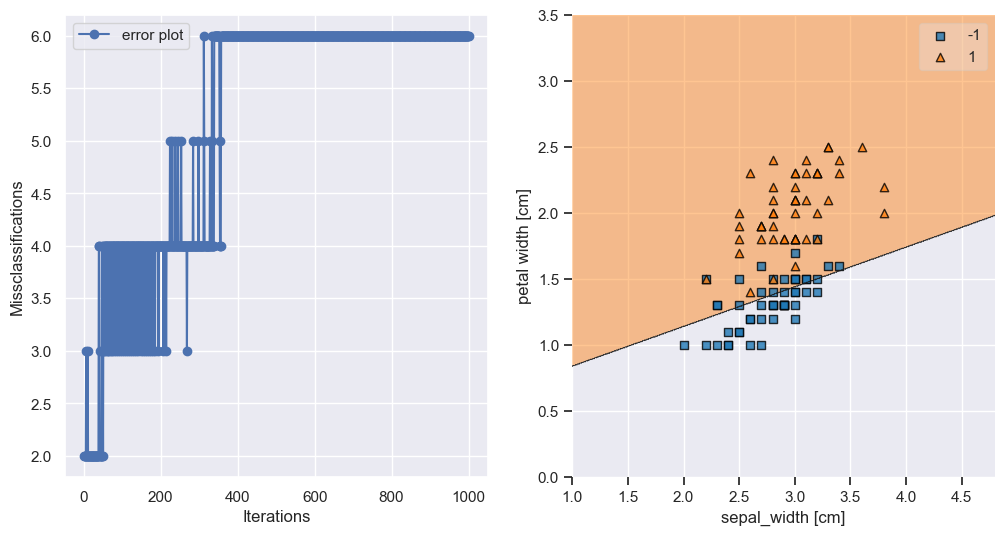

In [8]:
X = df[["sepal_width", "petal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="sepal_width [cm]", ylabel="petal width [cm]")
axes[0].legend()
plt.show()

* "petal_length" and "petal_width"

[False False False  True False  True False  True  True  True  True False
  True False  True False False  True False  True False  True False  True
  True False False False False  True  True  True  True False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


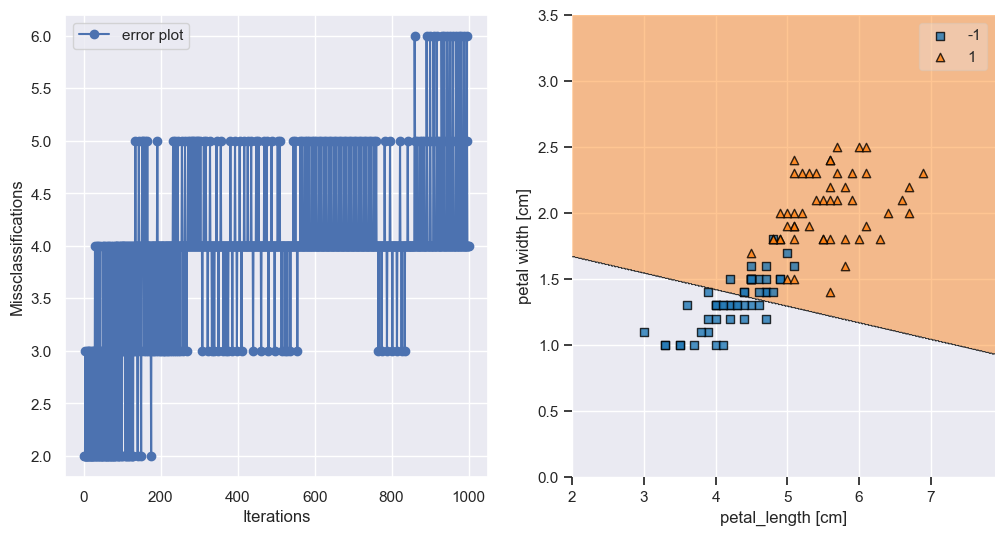

In [9]:
X = df[["petal_length", "petal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="petal_length [cm]", ylabel="petal width [cm]")
axes[0].legend()
plt.show()

* "sepal_length" and "sepal_width"

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


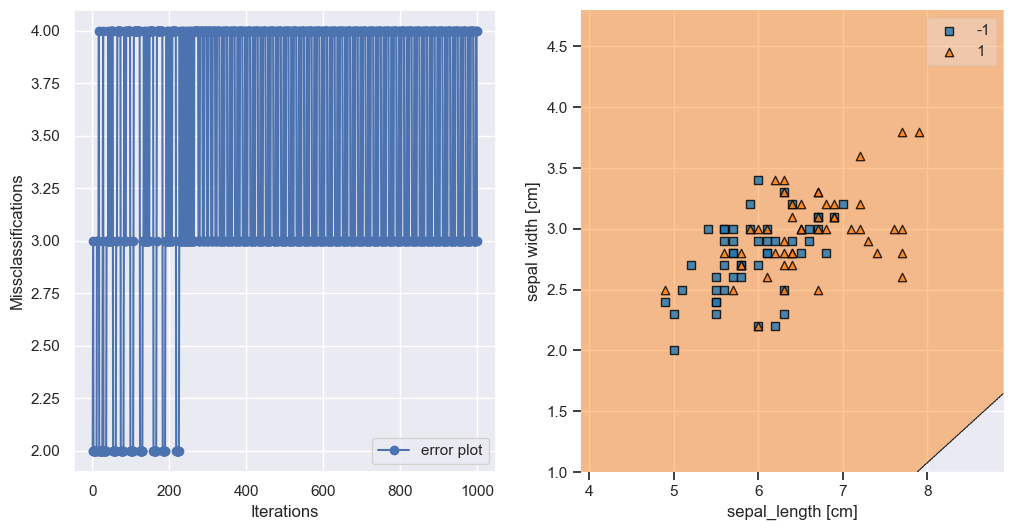

In [10]:
X = df[["sepal_length", "sepal_width"]].iloc[50:150].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="sepal_length [cm]", ylabel="sepal width [cm]")
axes[0].legend()
plt.show()

---

### Conclusion

1. If the data is not linearly seperable, than the classification may be false sometimes.
2. If the data of two groups overlap too much, the percentron model failed to classify the two group.

---

### **Part 2. Palmer Penguins Dataset**

In [11]:
df = pd.read_csv("Datasets/palmer_penguins.csv")
df = df.dropna() # remove the NA rows
df.drop(df.columns[0], axis=1, inplace=True)
df = df.reset_index(drop=True)
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [12]:
np.unique(df.species)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
np.unique(df.island)

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

The Palmer Penguins Dataset Description:
- Three species group: 'Adelie' / 'Chinstrap' / 'Gentoo'
- Three island group: 'Biscoe' / 'Dream' / 'Torgersen'
- Two gender group: 'Male' / 'Female'
- numeric parameters: 'bill_length_mm' / 'bill_depth_mm' / 'flipper_length_mm' / 'body_mass_g'

Therefore to implement the Percentron Algorithm in two situation:
1. Classify species group of 'Adelie' and 'Gentoo'
2. Classify island group of 'Biscoe' and 'Dream'

#### **Classify species group of 'Adelie' and 'Gentoo'**

<Figure size 600x300 with 0 Axes>

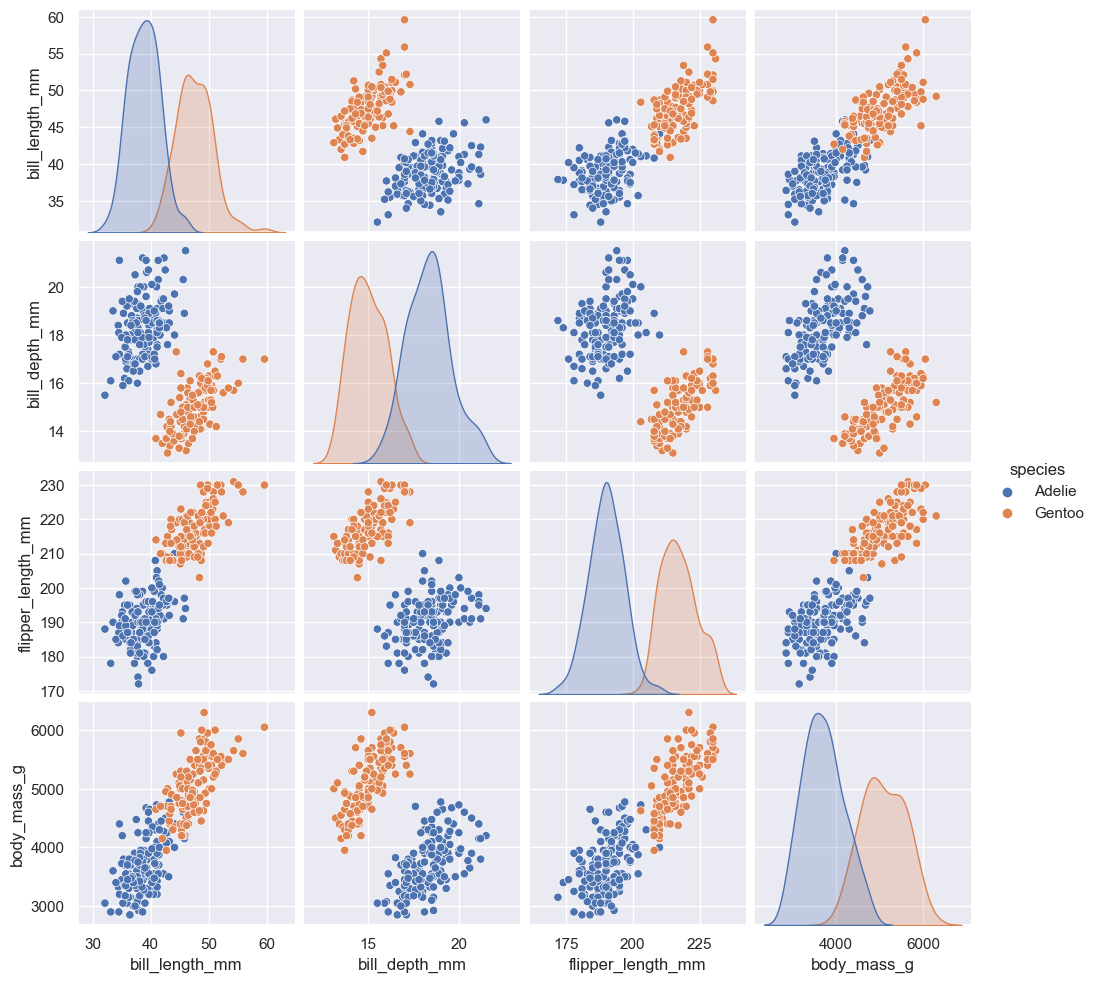

In [14]:
idx = df.index[(df.species == "Adelie") | (df.species == "Gentoo")]

plt.figure(figsize=(6, 3))
img = sns.pairplot(df.iloc[idx], hue  = "species")
plt.show(img)

Measurements 
* 'bill_length_mm' and 'bill_depth_mm'
* 'bill_depth_mm' and 'flipper_length_mm'
* 'bill_depth_mm' and 'body_mass_g'
* 'bill_length_mm' and 'flipper_length_mm'
* 'bill_length_mm' and 'body_mass_g'
* 'flipper_length_mm' and 'body_mass_g'

---
Take 'bill_length_mm' and 'bill_depth_mm' as an example:

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

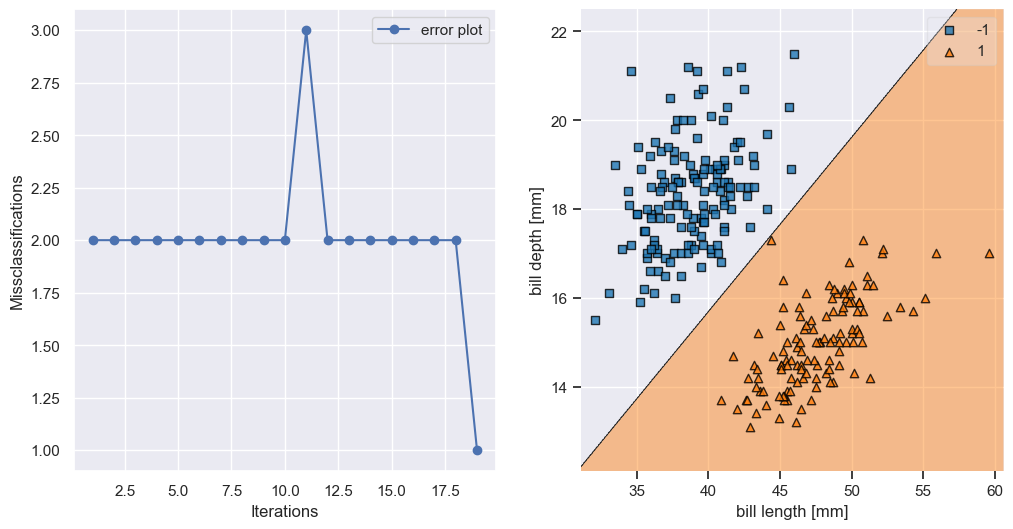

In [15]:
y = df.iloc[idx].species.values
y = np.where(y =="Adelie", -1, 1) 
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[idx].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="bill length [mm]", ylabel="bill depth [mm]")
axes[0].legend()
plt.show()

Take 'bill_depth_mm' and 'body_mass_g' as another example:

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

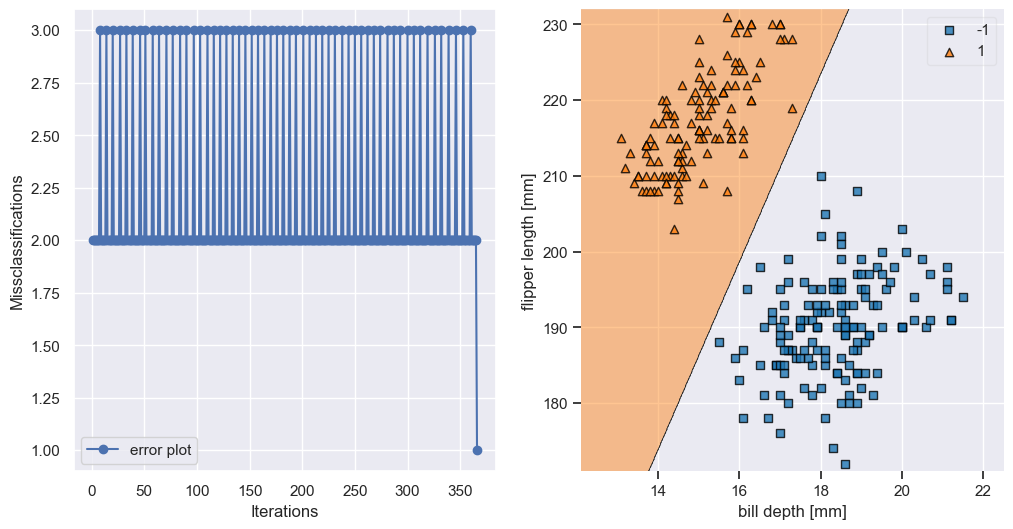

In [16]:
y = df.iloc[idx].species.values
y = np.where(y =="Adelie", -1, 1) 
X = df[["bill_depth_mm", "flipper_length_mm"]].iloc[idx].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="bill depth [mm]", ylabel="flipper length [mm]")
axes[0].legend()
plt.show()

#### **Classify species group of 'Biscoe' and 'Dream'**

<Figure size 600x300 with 0 Axes>

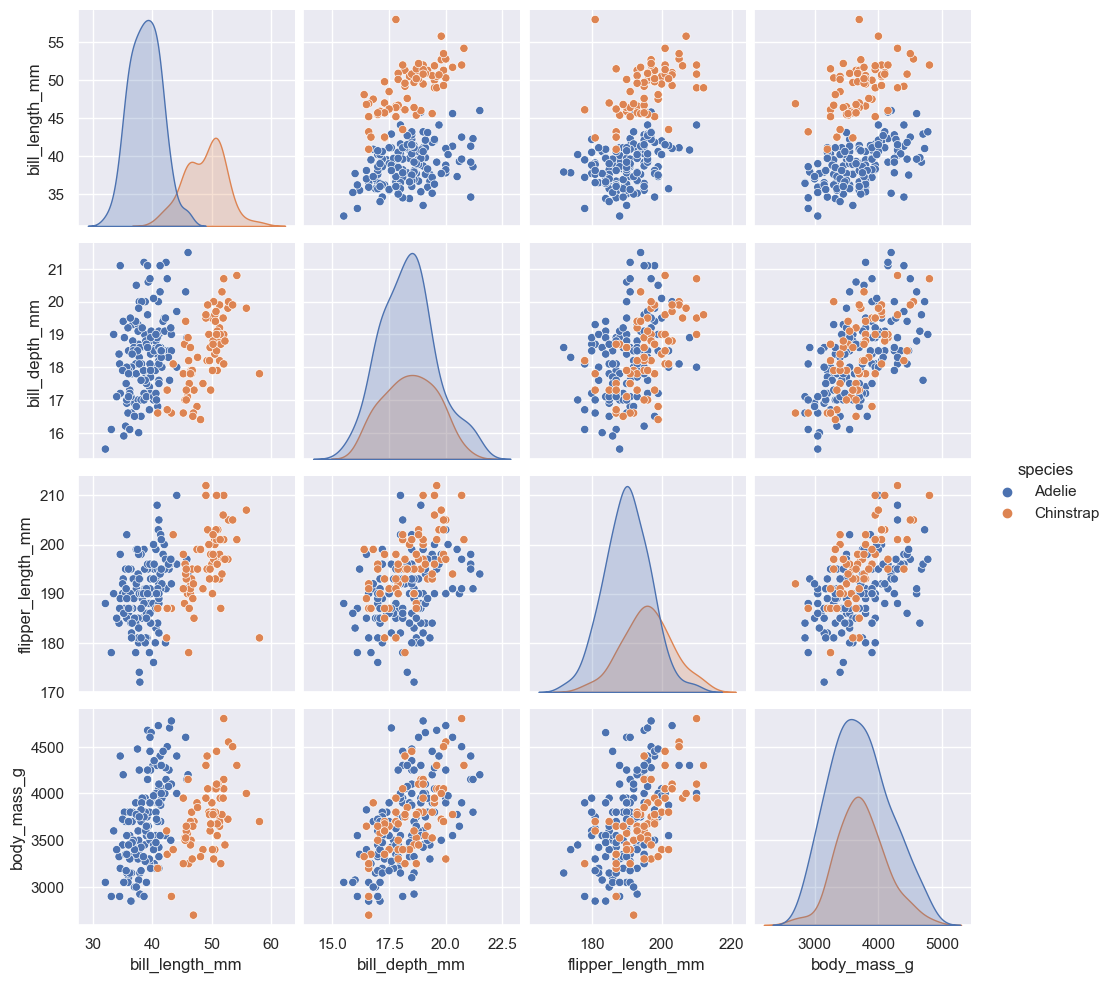

In [17]:
idx = df.index[(df.species == "Adelie") | (df.species == "Chinstrap")]

plt.figure(figsize=(6, 3))
img = sns.pairplot(df.iloc[idx], hue  = "species")
plt.show(img)

Measurements 
* 'bill_length_mm' and 'bill_depth_mm'
* 'bill_depth_mm' and 'flipper_length_mm'
* 'bill_depth_mm' and 'body_mass_g'
* 'bill_length_mm' and 'flipper_length_mm'
* 'bill_length_mm' and 'body_mass_g'
* 'flipper_length_mm' and 'body_mass_g'

---
Take 'bill_length_mm' and 'bill_depth_mm' as an example:

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

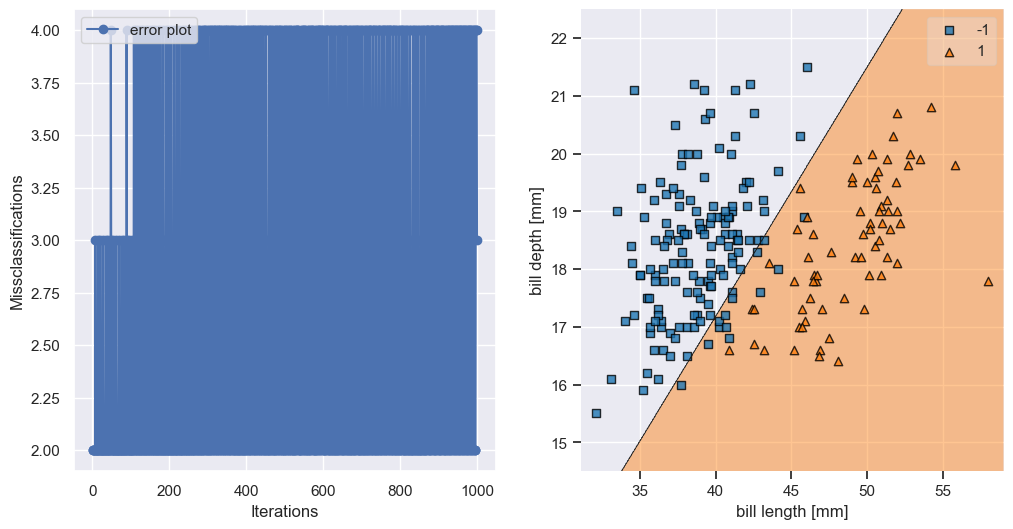

In [18]:
y = df.iloc[idx].species.values
y = np.where(y =="Adelie", -1, 1) 
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[idx].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="bill length [mm]", ylabel="bill depth [mm]")
axes[0].legend()
plt.show()

Take 'bill_depth_mm' and 'body_mass_g' as another example:

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

c:\Users\60973\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


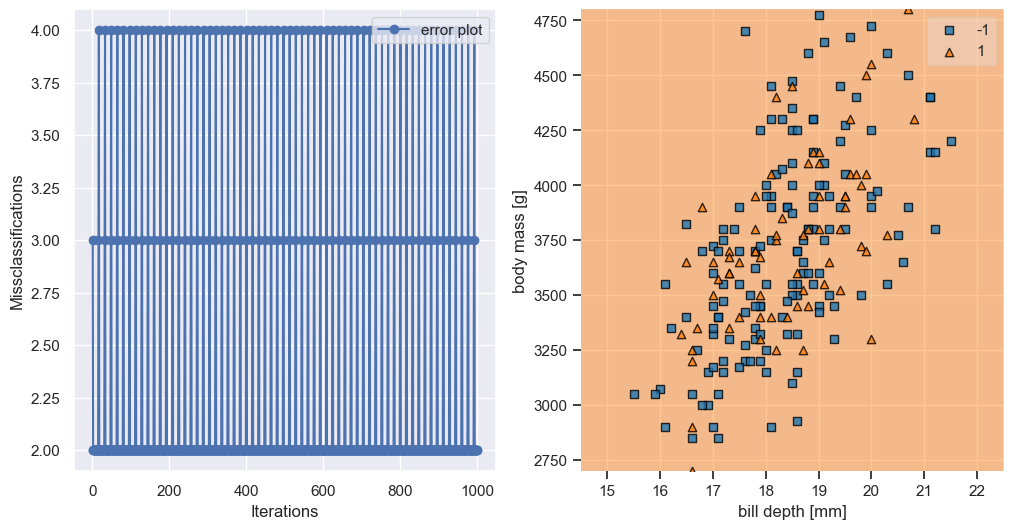

In [19]:
y = df.iloc[idx].species.values
y = np.where(y =="Adelie", -1, 1) 
X = df[["bill_depth_mm", "body_mass_g"]].iloc[idx].values 
# training
percep = Perceptron(epochs = 1000)
percep.train(X, y)
# predict and result comparison
y_hat = percep.predict(X)
print(y == y_hat)
# desicion plot and erroe plot
fig,axes=plt.subplots(ncols=2,figsize=(12,6))
sc1 = axes[0].plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
sc2 = plot_decision_regions(X, y, clf = percep)
axes[0].set(xlabel="Iterations", ylabel="Missclassifications")
axes[1].set(xlabel="bill depth [mm]", ylabel="body mass [g]")
axes[0].legend()
plt.show()